Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [39]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [34]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2259
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,seed=123,validation_split=0.2,subset="training",image_size=(img_height,img_width),batch_size=batch_size)

Found 2259 files belonging to 9 classes.
Using 1808 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,seed=123,validation_split=0.2,subset="validation",image_size=(img_height,img_width),batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

model = Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))
model.add(Conv2D(16,kernel_size=3,strides =(1,1),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32,kernel_size=3,strides =(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size=3,strides =(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(9,activation='softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
#@title Default title text

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        1

### Train the model

In [14]:

epochs = 20
batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)#

Epoch 1/20
57/57 [==============================] - 309s 140ms/step - loss: 1.9419 - accuracy: 0.2815 - val_loss: 3.0177 - val_accuracy: 0.0435
Epoch 2/20
57/57 [==============================] - 1s 16ms/step - loss: 1.6550 - accuracy: 0.4110 - val_loss: 2.1949 - val_accuracy: 0.2609
Epoch 3/20
57/57 [==============================] - 1s 16ms/step - loss: 1.5124 - accuracy: 0.4707 - val_loss: 2.1040 - val_accuracy: 0.3043
Epoch 4/20
57/57 [==============================] - 1s 16ms/step - loss: 1.4315 - accuracy: 0.5050 - val_loss: 2.8219 - val_accuracy: 0.2174
Epoch 5/20
57/57 [==============================] - 1s 17ms/step - loss: 1.3707 - accuracy: 0.5138 - val_loss: 2.7299 - val_accuracy: 0.2609
Epoch 6/20
57/57 [==============================] - 1s 16ms/step - loss: 1.2515 - accuracy: 0.5603 - val_loss: 2.9637 - val_accuracy: 0.2609
Epoch 7/20
57/57 [==============================] - 1s 16ms/step - loss: 1.2038 - accuracy: 0.5808 - val_loss: 2.6006 - val_accuracy: 0.2174
Epoch 8/20

### Visualizing training results

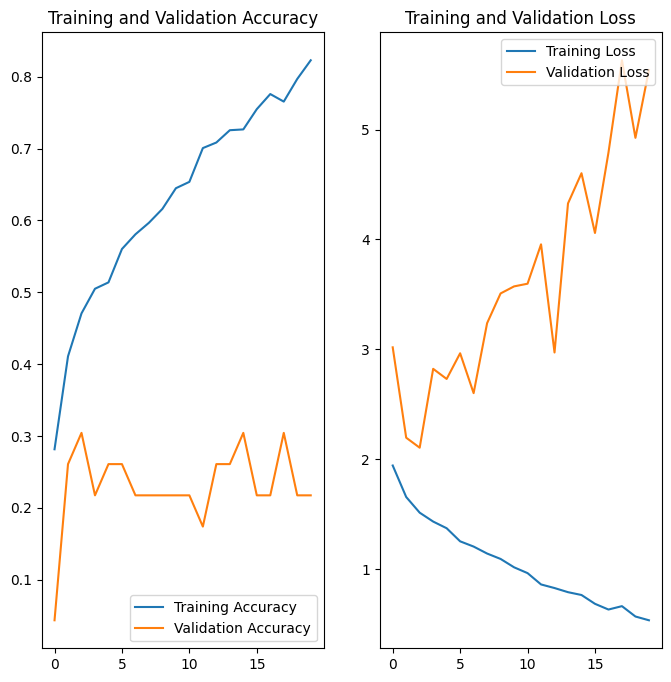

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [ ]:

#Finding on the first base model

#The model is overfitting because we can also see difference in loss functions in training & test. The training accuracy grows consistently across the epochs and achieves a high value of 0.82, demonstrating the model's success with the training set. 
#The validation accuracy, on the other hand, varies around 0.304
#The accuracy is just around 80% because there are enough features to remember the pattern.



In [17]:
#Todo, after you have analysed the model fit history for presence of underfit or overfit, 
#choose an appropriate data augumentation strategy.

### Todo:
### Create the model, compile and train the model


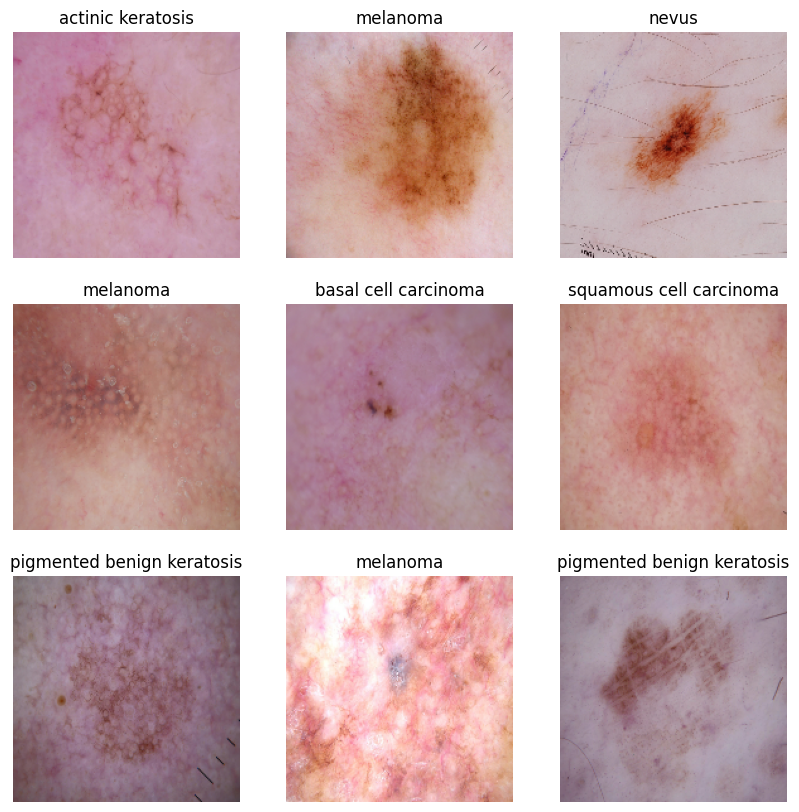

In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Compiling the model

In [19]:
## Your code goes here
model = Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))
model.add(Conv2D(16,kernel_size=3,strides =(1,1),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32,kernel_size=3,strides =(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size=3,strides =(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(9,activation='softmax'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 64)       

### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs
##history = ## your training code
epochs = 20
batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)#

Epoch 1/20
57/57 [==============================] - 2s 20ms/step - loss: 2.0411 - accuracy: 0.2373 - val_loss: 2.5081 - val_accuracy: 0.0435
Epoch 2/20
57/57 [==============================] - 1s 16ms/step - loss: 1.7588 - accuracy: 0.3722 - val_loss: 2.8862 - val_accuracy: 0.0870
Epoch 3/20
57/57 [==============================] - 1s 16ms/step - loss: 1.5497 - accuracy: 0.4668 - val_loss: 2.5477 - val_accuracy: 0.2174
Epoch 4/20
57/57 [==============================] - 1s 16ms/step - loss: 1.4439 - accuracy: 0.4967 - val_loss: 2.7805 - val_accuracy: 0.2609
Epoch 5/20
57/57 [==============================] - 1s 16ms/step - loss: 1.3776 - accuracy: 0.5227 - val_loss: 2.5800 - val_accuracy: 0.2174
Epoch 6/20
57/57 [==============================] - 1s 16ms/step - loss: 1.3173 - accuracy: 0.5354 - val_loss: 2.6021 - val_accuracy: 0.1739
Epoch 7/20
57/57 [==============================] - 1s 16ms/step - loss: 1.2693 - accuracy: 0.5680 - val_loss: 2.6165 - val_accuracy: 0.2174
Epoch 8/20
57

### Visualizing the results

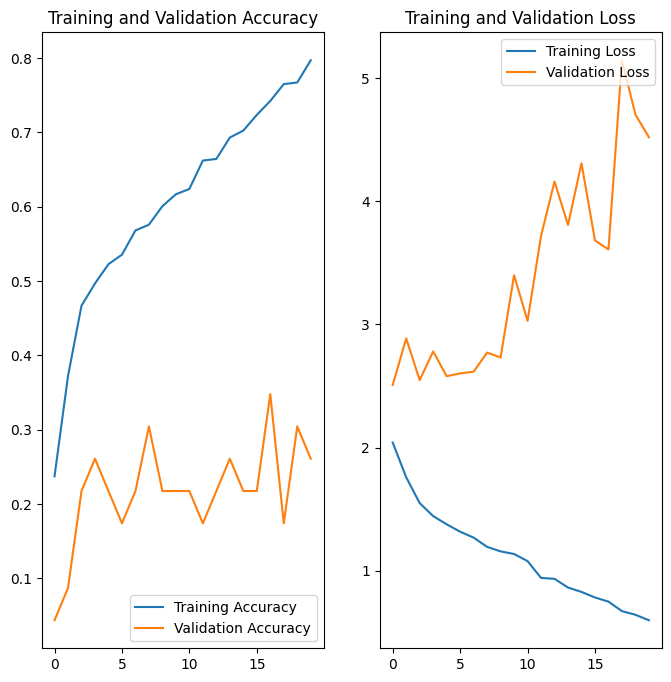

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

In [24]:
#Model 1:

#    The training accuracy starts at 28% and gradually increases over the epochs, reaching 82% at the end.
#    The training loss decreases over the epochs, indicating that the model is learning from the data.
#    The validation accuracy fluctuates between 21% and 26% .
#    The validation loss increases over the epochs, suggesting that the model is struggling to generalize to unseen data.


In [25]:
#Model 2:

#    The training accuracy starts at 28% and gradually increases over the epochs, reaching 79% at the end.
#    The training loss decreases over the epochs, indicating that the model is learning from the data.
#    The validation accuracy fluctuates between 21% and 30% .
#    The validation loss increases over the epochs, suggesting that the model is struggling to generalize to unseen data.

#both models exhibit signs of overfitting and have relatively low validation accuracy.


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
import glob
class_directories = glob.glob(os.path.join(data_dir_train, "*"))

# Initialize a dictionary to store the class distribution
class_distribution = {}

# Iterate through each class directory
for class_dir in class_directories:
    # Extract the class name from the directory path
    class_name = os.path.basename(class_dir)
    # Count the number of images in the class directory
    num_samples = len(glob.glob(os.path.join(class_dir, "*.jpg")))
    # Update the class distribution dictionary
    class_distribution[class_name] = num_samples

# Print the class distribution
print("Class Distribution:")
for class_name, num_samples in class_distribution.items():
    print(f"{class_name}: {num_samples}")

Class Distribution:
pigmented benign keratosis: 462
basal cell carcinoma: 396
squamous cell carcinoma: 181
actinic keratosis: 114
melanoma: 438
seborrheic keratosis: 77
vascular lesion: 139
nevus: 357
dermatofibroma: 95


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


In [27]:
#The class "seborrheic keratosis" has the least number of samples, with only 77 instances
#The classes "pigmented benign keratosis" and "basal cell carcinoma" dominate the data in terms of the proportionate number of samples. 

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [28]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [53]:
os.chdir('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [54]:
pwd

'/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train'

In [60]:
#path_to_training_dataset="\content\gdrive\MyDrive\Skin cancer ISIC The International Skin Imaging Collaboration\Train"
path_to_training_dataset="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F25400C8640>: 100%|██████████| 500/500 [00:22<00:00, 22.59 Samples/s]


Initialised with 396 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F24B023DC00>: 100%|██████████| 500/500 [00:20<00:00, 24.44 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2522509330>: 100%|██████████| 500/500 [00:23<00:00, 21.42 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F25216E08E0>: 100%|██████████| 500/500 [01:53<00:00,  4.42 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2522793130>: 100%|██████████| 500/500 [01:57<00:00,  4.27 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F25216E10F0>: 100%|██████████| 500/500 [00:21<00:00, 23.54 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F24B01B1C90>: 100%|██████████| 500/500 [00:49<00:00, 10.20 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2522792320>: 100%|██████████| 500/500 [00:22<00:00, 21.97 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F24B00394E0>: 100%|██████████| 500/500 [00:21<00:00, 23.66 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [61]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [66]:
import glob
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]
path_list


['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025209.jpg_fb9bf5e5-56ec-4602-af97-f739f134bcfe.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0028264.jpg_4973cfb3-f10b-4696-89fd-336bb29c17e8.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025351.jpg_2d19f3eb-5a57-4284-9a5d-7dadf1d7b832.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025656.jpg_721cebd7-f2aa-49be-a47b-70638c4c1622.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented 

In [68]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]
lesion_list_new


['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [70]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [72]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [73]:
new_df['Label'].value_counts()

pigmented benign keratosis    500
basal cell carcinoma          500
squamous cell carcinoma       500
actinic keratosis             500
melanoma                      500
seborrheic keratosis          500
vascular lesion               500
nevus                         500
dermatofibroma                500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [74]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [75]:
#data_dir_train="path to directory with training data + data created using augmentor"
data_dir_train="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6759 files belonging to 9 classes.
Using 5408 files for training.


#### **Todo:** Create a validation dataset

In [77]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6759 files belonging to 9 classes.
Using 1351 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [78]:

model = Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))
model.add(Conv2D(16,kernel_size=3,strides =(1,1),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32,kernel_size=3,strides =(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size=3,strides =(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))

model.add(Dense(9,activation='softmax'))




#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [79]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 41, 64)       

#### **Todo:**  Train your model

In [80]:
epochs = 50
batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)#

Epoch 1/50
169/169 [==============================] - 42s 231ms/step - loss: 1.7976 - accuracy: 0.3107 - val_loss: 1.4273 - val_accuracy: 0.4663
Epoch 2/50
169/169 [==============================] - 40s 227ms/step - loss: 1.4547 - accuracy: 0.4490 - val_loss: 1.2872 - val_accuracy: 0.5218
Epoch 3/50
169/169 [==============================] - 36s 204ms/step - loss: 1.3259 - accuracy: 0.5011 - val_loss: 1.1999 - val_accuracy: 0.5285
Epoch 4/50
169/169 [==============================] - 36s 203ms/step - loss: 1.2004 - accuracy: 0.5433 - val_loss: 1.2621 - val_accuracy: 0.5115
Epoch 5/50
169/169 [==============================] - 40s 228ms/step - loss: 1.0975 - accuracy: 0.5897 - val_loss: 0.9935 - val_accuracy: 0.6314
Epoch 6/50
169/169 [==============================] - 40s 228ms/step - loss: 0.9678 - accuracy: 0.6365 - val_loss: 0.9381 - val_accuracy: 0.6551
Epoch 7/50
169/169 [==============================] - 39s 227ms/step - loss: 0.8751 - accuracy: 0.6690 - val_loss: 0.9407 - val_ac

#### **Todo:**  Visualize the model results

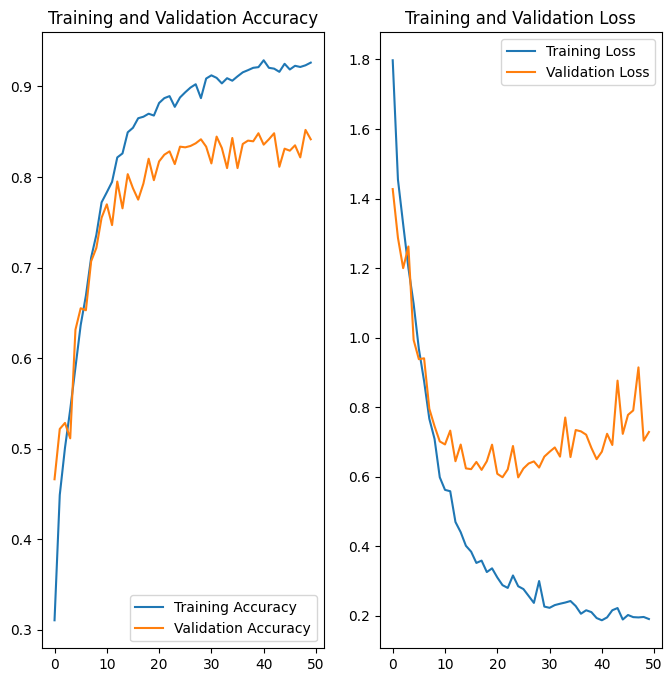

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
#Observation
#Yes class rebalance helped to remove overfitting.
# The model's training loss  decreased  and training accuracy increased.
#validation loss and accuracy perform well , no  overfitting or underfitting
